## Demand profile by time

this is the second installment in what can be seen as the initial analysis from live chat.

I have yet to make any adjustments using NLP.  In this I will be hoping to get an idea of what is happening over time from the following plots below.

In this we will look at three different plots.  
* The average length of conversation per day of month, 
* the average length of conversation per day of the week and 
* the average length of conversation per time of day broken down into hours.  

In each of these calculate the count of chats

In this last one we will also overlay the average time in que.

The first thing to do is to rearrange our original data frame df_chats to give us these values.

## Tip

if some of the drop time commands aren't working check the data type and then maybe convert to datetime and then set the time to an index (row value names)

Lets make our usual imports then start setting up a new dataframe from chats to manipulate our data. In our case the date time has come out as a date but if it came out as a str, which you should always check, then I've included a little parse for you to change it to datetime.  You have to be a little careful with the sintax but you can look up the relevant commands easily.

In [5]:
#this will keep all our graphs in the page
%matplotlib inline

# a few libraries that we will need

import numpy as np 
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

#set up pandas table display
pd.set_option ("display.width", 500)
pd.set_option ("display.max_columns", 100)
pd.set_option ("display.notebook_repr_html", True)
import seaborn as sns #gives us a bit more style in our plots

#We need this to look at excel files
import openpyxl

from pandas import DataFrame, read_excel, merge

file_name = r"C:\Users\Mrs Farrelly\Documents\James\LiveChat\chats_report_October18_appended.xlsx"
#table1 = chats_report_October18
#this line is key...it calls the str day an actual date
#dateparse = lambda x:pd.datetime.strptime(x, '%d/%m/%Y %H:%M')
df_chats = pd.read_excel(file_name, header = 0)
                #, parse_dates = ["chat start date Europe/London"], date_parser = dateparse)
print (df_chats.dtypes)
df_chats.head()

#lets create a dataframe using out chats_report_October18.xlsx
#df_chats = pd.read_excel (file_name, sheet_name = table1, header = 0)

conferenceId                                object
chat creation date Europe/London    datetime64[ns]
chat start date Europe/London       datetime64[ns]
chat duration in seconds                     int64
queue duration in seconds                  float64
rate                                        object
operator 1 nick                             object
first response time                        float64
average response time                      float64
dtype: object


,conferenceId,chat creation date Europe/London,chat start date Europe/London,chat duration in seconds,queue duration in seconds,rate,operator 1 nick,first response time,average response time
0,PFWWMRWSUQ,2018-10-01 08:12:00,2018-10-01 08:12:00,595,NaN,not rated,Ellie,35.0,37.0
1,PFXWSSVIXS,2018-10-01 08:31:00,2018-10-01 08:31:00,45,NaN,not rated,Ellie,NaN,NaN
2,PFYWKS8Y9W,2018-10-01 08:32:00,2018-10-01 08:32:00,182,NaN,not rated,Ellie,26.0,26.0
3,PFZWPTLQTY,2018-10-01 08:49:00,2018-10-01 08:49:00,103,NaN,not rated,Ellie,10.0,8.0
4,PF2W3VWLQ4,2018-10-01 09:29:00,2018-10-01 09:29:00,127,NaN,not rated,Ellie,7.0,11.0


## Setting up date to datetime as an index

In [6]:
from datetime import date
import calendar
#an important thing for working with time series is to set an index

#this creates our data frame of two columns from df_chats
df_days = df_chats[["chat start date Europe/London","chat duration in seconds" ]]
#this renames our columns
df_days = df_days.rename(columns = {"chat start date Europe/London":"date", "chat duration in seconds":"Avg_chat_time"})
#this adds a new column to our df_days and sets it to the value of the date column and makes it a datetime output
df_days["datetime"] = pd.to_datetime(df_days.date)
#this reorders the datetime to day month year

#this sets our datetime as an index
df_days = df_days.set_index('datetime')
#This drops the old column name of date
#df_days.drop(["date"], axis = 1, inplace = True)
#lets have a look
print (df_days.dtypes)
df_days.head()
#print (df_days.dtypes)

#lets create an average for each day
#monday_means = (df_daysAVG.loc[(df_daysAVG.weekday_name == 'Monday').mean()

date             datetime64[ns]
Avg_chat_time             int64
dtype: object


,date,Avg_chat_time
datetime,,
2018-10-01 08:12:00,2018-10-01 08:12:00,595
2018-10-01 08:31:00,2018-10-01 08:31:00,45
2018-10-01 08:32:00,2018-10-01 08:32:00,182
2018-10-01 08:49:00,2018-10-01 08:49:00,103
2018-10-01 09:29:00,2018-10-01 09:29:00,127


### Resampling

Allows you to take only the day 'D' month 'M' year 'Y' etc from our data as an average (.mean())

In [7]:
#this resamples our data leaving only the date not the time 'D' stands for day
df_days = df_days.resample('D').mean()
#this resets the date to the resampled datetime from our index
df_days["date"] = df_days.index
df_days.head()
#df_days.head()

,Avg_chat_time,date
datetime,,
2018-10-01,600.625000,2018-10-01
2018-10-02,532.166667,2018-10-02
2018-10-03,629.575758,2018-10-03
2018-10-04,453.142857,2018-10-04
2018-10-05,437.047619,2018-10-05


([<matplotlib.axis.XTick at 0x4e80de0d30>,
 <a list of 31 Text xticklabel objects>)

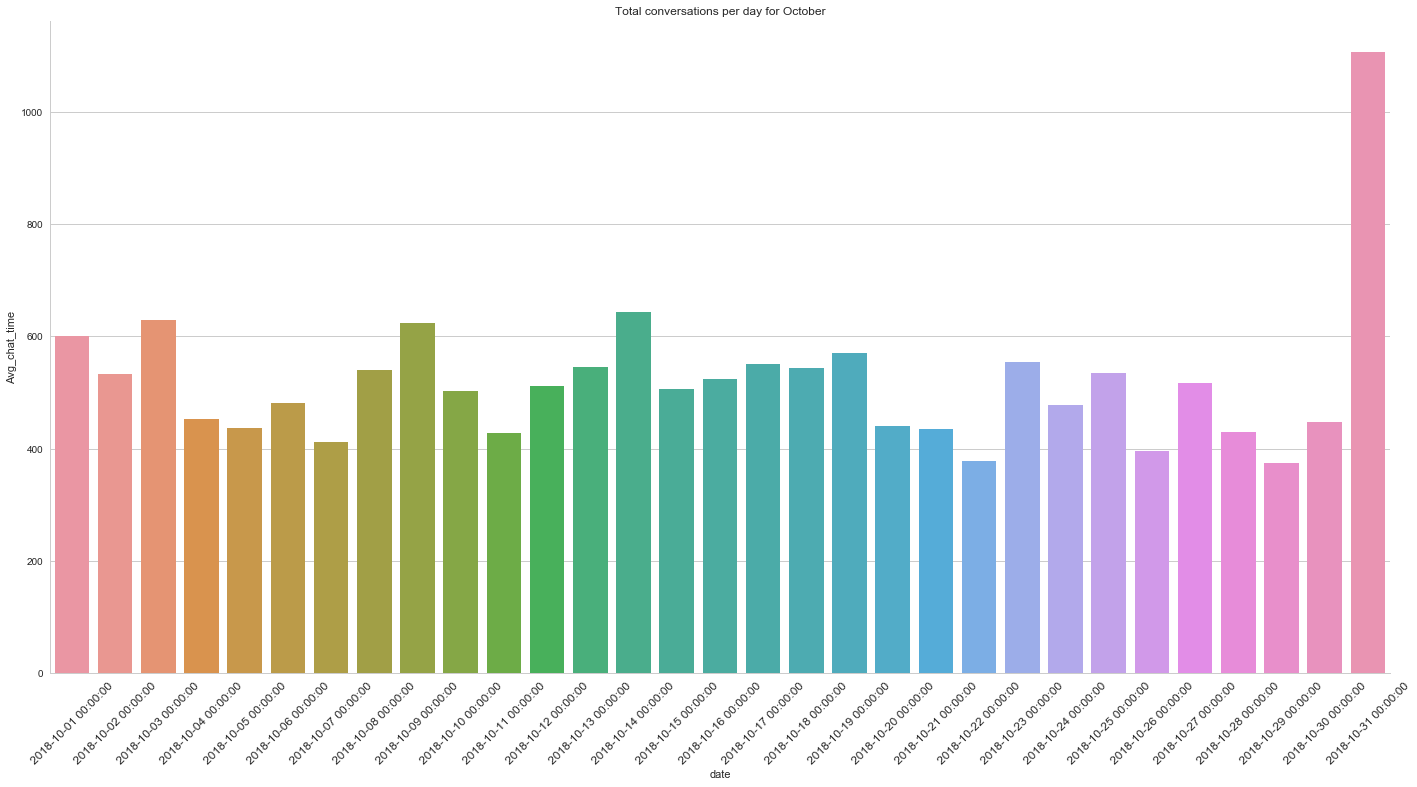

In [9]:
ind = [x for x, _ in enumerate(df_days["date"])]
names = df_days["date"]
tips = df_days

sns.set(style="whitegrid")
x = df_days["date"]
y = df_days["Avg_chat_time"]
ax = sns.barplot(x, y, data=tips)

sns.set(rc={'figure.figsize':(24,12)})

plt.title("Total conversations per day for October")


#removes the spines to make things look pretty
sns.despine()
#tells us what we want on the ticks for the x axis
plt.xticks(ind, names, rotation = 45, fontsize = 12)


# rotate axis labels
#plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

looking back over the original data set this anomyly on 2018-10-31 is not a mistake.  Raises some question as to why time was almost double the lenth of all the others. 

## Average length of conversation per day of the week

A new approach.  Lets set the time stamp as an index  (row headers if you like) and then try and do some manipulation based on this.

In [10]:
#lets see what kind of datatype our date column is 
print (df_days["date"].dtype)

datetime64[ns]


In [11]:
#lets create a new column that gets the days of the week from the date
#I checked and this is actually the days
#this is good to see what the days are but actually it isn't needed because of the indexing
df_dotw = df_days
df_dotw["days_of_week"] = df_dotw["date"].dt.day_name()
#df_dotw



In [12]:
#now that we've got the day of the week we can loop through and column days_of_week
#and create an average per days_of_week

#there are two ways of doing this now.  I can either try to resample based on days of the week
#or...I can create a  new dataframe of each day then a
#dictionary based on days_of_week then average the days_of_week
#then create a new dateframe based on these values which I can then bar chart.

#check out this documentation
#http://pandas.pydata.org/pandas-docs/stable/timeseries.html#anchored-offsets

#lets try resampling and then finding the values for each day of the week
#Monday
df_daysM = df_days.resample('W-MON').mean()
#df_daysM


In [13]:
Avg_Mon = df_daysM.Avg_chat_time.mean()
#Avg_Mon

In [14]:
#Tuesday
df_daysT = df_days.resample('W-TUE').mean()
Avg_Tue= df_daysT.Avg_chat_time.mean()
#Wed
df_daysW = df_days.resample('W-WED').mean()
Avg_Wed = df_daysW.Avg_chat_time.mean()
#Thurs
df_daysTh = df_days.resample('W-THU').mean()
Avg_Thu = df_daysTh.Avg_chat_time.mean()
#Friday
df_daysF = df_days.resample('W-FRI').mean()
Avg_Fri = df_daysF.Avg_chat_time.mean()
#Sat
df_daysSa = df_days.resample('W-SAT').mean()
Avg_Sat = df_daysSa.Avg_chat_time.mean()
#Sun
df_daysSu = df_days.resample('W-SUN').mean()
Avg_Sun = df_daysSu.Avg_chat_time.mean()

#create a list based on the Avg_days
Avg_days = Avg_Mon, Avg_Tue, Avg_Wed, Avg_Thu, Avg_Fri, Avg_Sat, Avg_Sun
#Avg_days

In [15]:
days = 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
#days

In [16]:
days_dict = dict(zip(days, Avg_days))
#days_dict

In [17]:
#create a dataframe which is 
df_CABW = pd.DataFrame.from_dict(days_dict, columns = ["Avg_days"],orient = "index")
#df_CABW


In [18]:
df_CABW["day"] = df_CABW.index
df_CABW

,Avg_days,day
Monday,562.211793,Monday
Tuesday,609.514632,Tuesday
Wednesday,527.854662,Wednesday
Thursday,523.756515,Thursday
Friday,523.870788,Friday
Saturday,526.135319,Saturday
Sunday,534.151201,Sunday


Lets create a bar chart

([<matplotlib.axis.XTick at 0x4e8717dd30>,
 <a list of 7 Text xticklabel objects>)

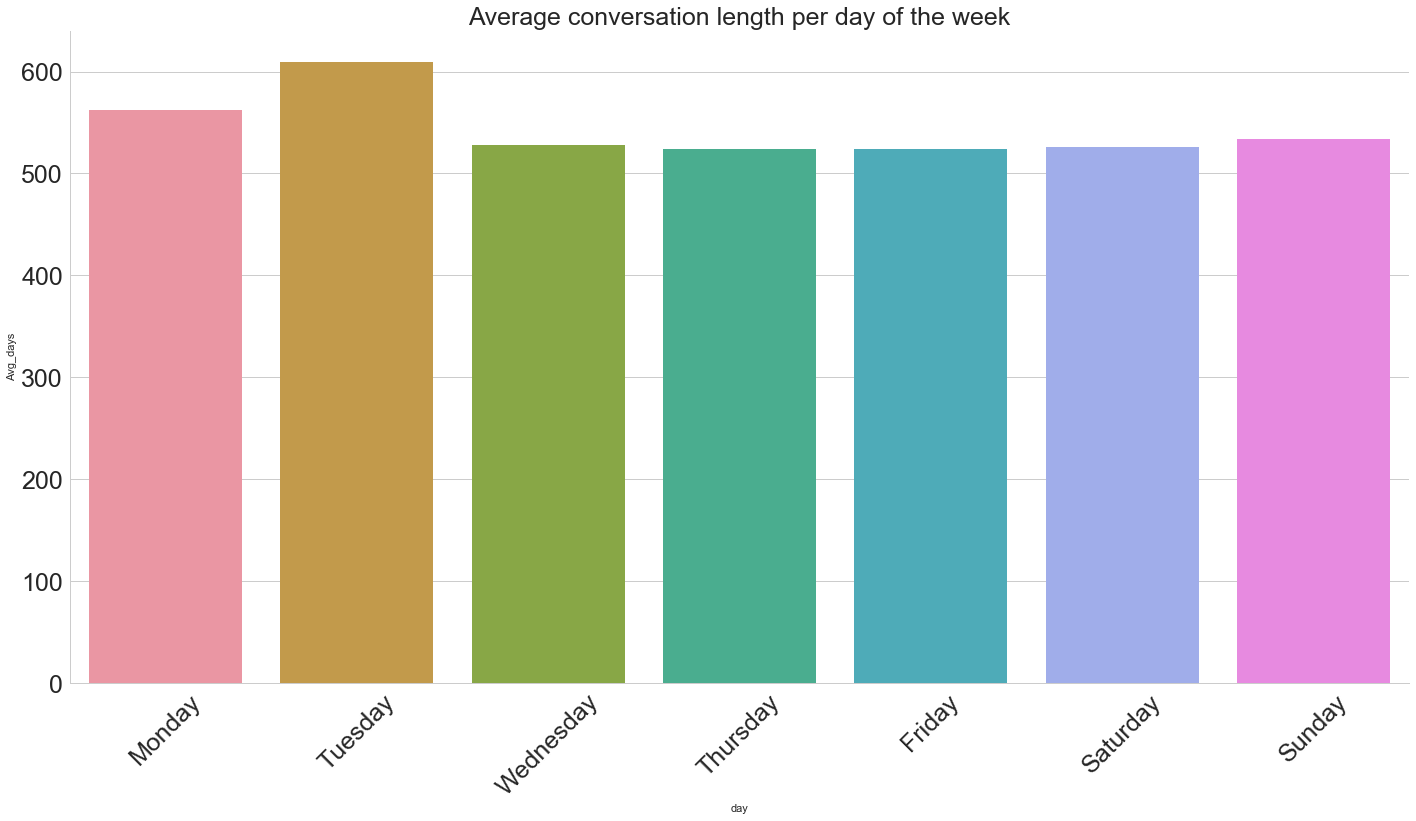

In [19]:
ind = [x for x, _ in enumerate(df_CABW["day"])]
names = df_CABW["day"]
tips = df_days

sns.set(style="whitegrid")
x = df_CABW["day"]
y = df_CABW["Avg_days"]
ax = sns.barplot(x, y, data=tips)

sns.set(rc={'figure.figsize':(24,12)})

plt.title("Average conversation length per day of the week", fontsize = 25)
plt.yticks(fontsize = 25)

#removes the spines to make things look pretty
sns.despine()
#tells us what we want on the ticks for the x axis
plt.xticks(ind, names, rotation = 45, fontsize = 25)


# rotate axis labels
#plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

## Live chat count per day of the month

We'll start with the usual stuff to set up an index as the date so we can filter later.

We're going to call this data frame df_count and it will count the average number of live chats per day of the week in the same way that df_days did. We will chart the average number of chats held in a que for each day of the week as well to see if there is a day of the week that needs more live chat support.

From this same data frame we can also generate a profile for the month in terms of volume of calls.



In [20]:

#this creates our data frame of two columns from df_chats
df_count = df_chats[["chat start date Europe/London","chat duration in seconds", "queue duration in seconds" ]]
#this renames our columns
df_count = df_count.rename(columns = {"chat start date Europe/London":"date", "chat duration in seconds":"chat_count", "queue duration in seconds":"que"})
#this adds a new column to our df_days and sets it to the value of the date column and makes it a datetime output
df_count["datetime"] = pd.to_datetime(df_count.date)
#this reorders the datetime to day month year

#this sets our datetime as an index
df_count = df_count.set_index('datetime')
#This drops the old column name of date
#df_days.drop(["date"], axis = 1, inplace = True)
#lets have a look
print (df_count.dtypes)
#df_count.head()
#print (df_days.dtypes)

#lets create an average for each day
#monday_means = (df_daysAVG.loc[(df_daysAVG.weekday_name == 'Monday').mean()

date          datetime64[ns]
chat_count             int64
que                  float64
dtype: object


In [21]:
#this is going to give the number of live chats per day
df_count2 = df_count.groupby(pd.Grouper(freq ='D')).count()
#df_count2.head()

In [22]:
#change the date to reflect the date from datetime

df_count2["date"] = df_count2.index
#return just the date
df_count2["date"] = df_count2['date'].dt.date
#df_count2.head()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

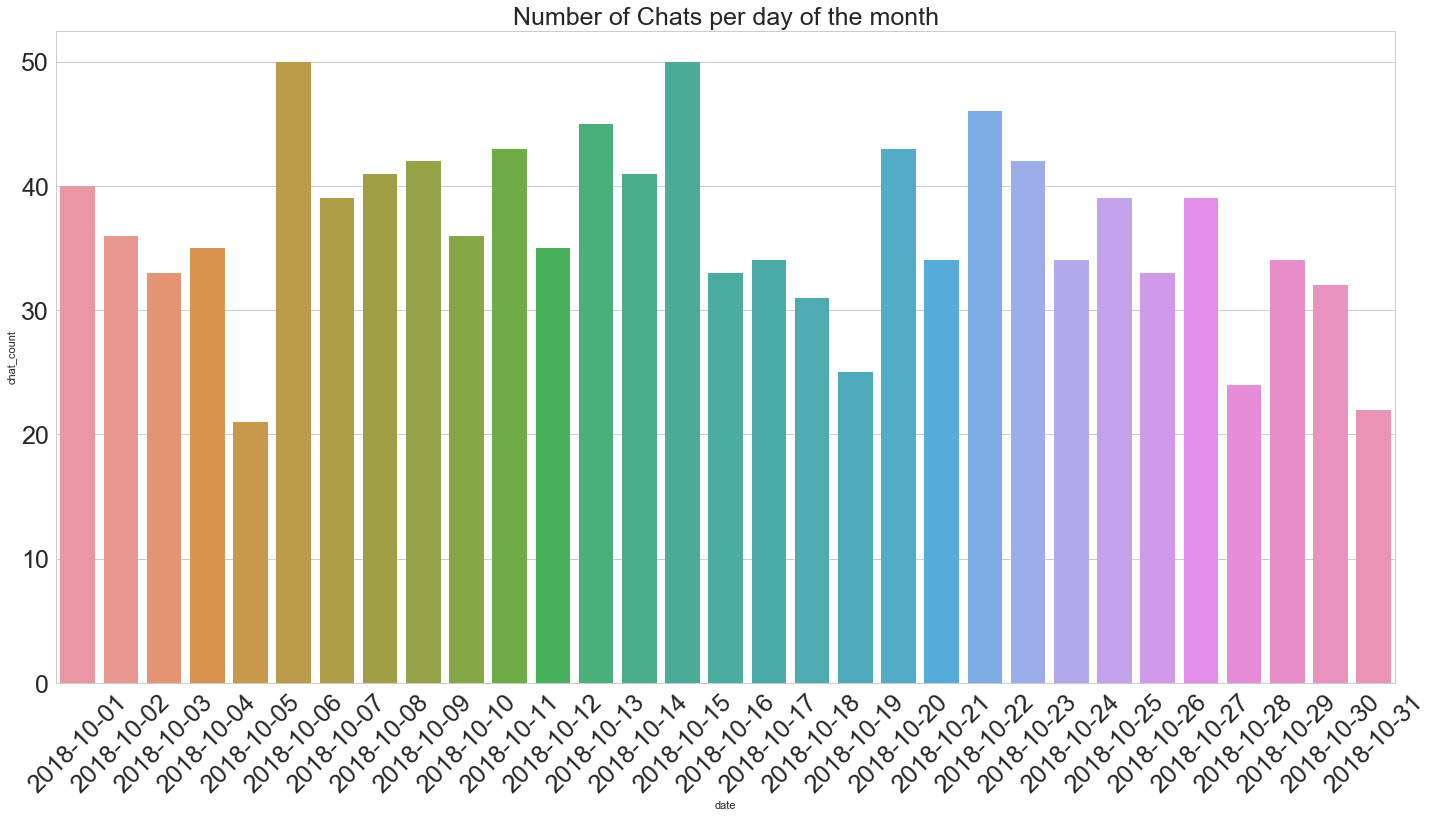

In [23]:
#lets try a bar plot of the month and overlay a lineplot
sns.set(style="whitegrid")
ax = sns.barplot(x = "date", y = "chat_count",  data = df_count2)
#ax2 = ax.twinx()
#ax2 = sns.lineplot(x = "date", y = "que", data = df_count2)
plt.title("Number of Chats per day of the month", fontsize = 25)

plt.yticks (fontsize = 25)
plt.xticks(rotation = 45, fontsize = 25)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

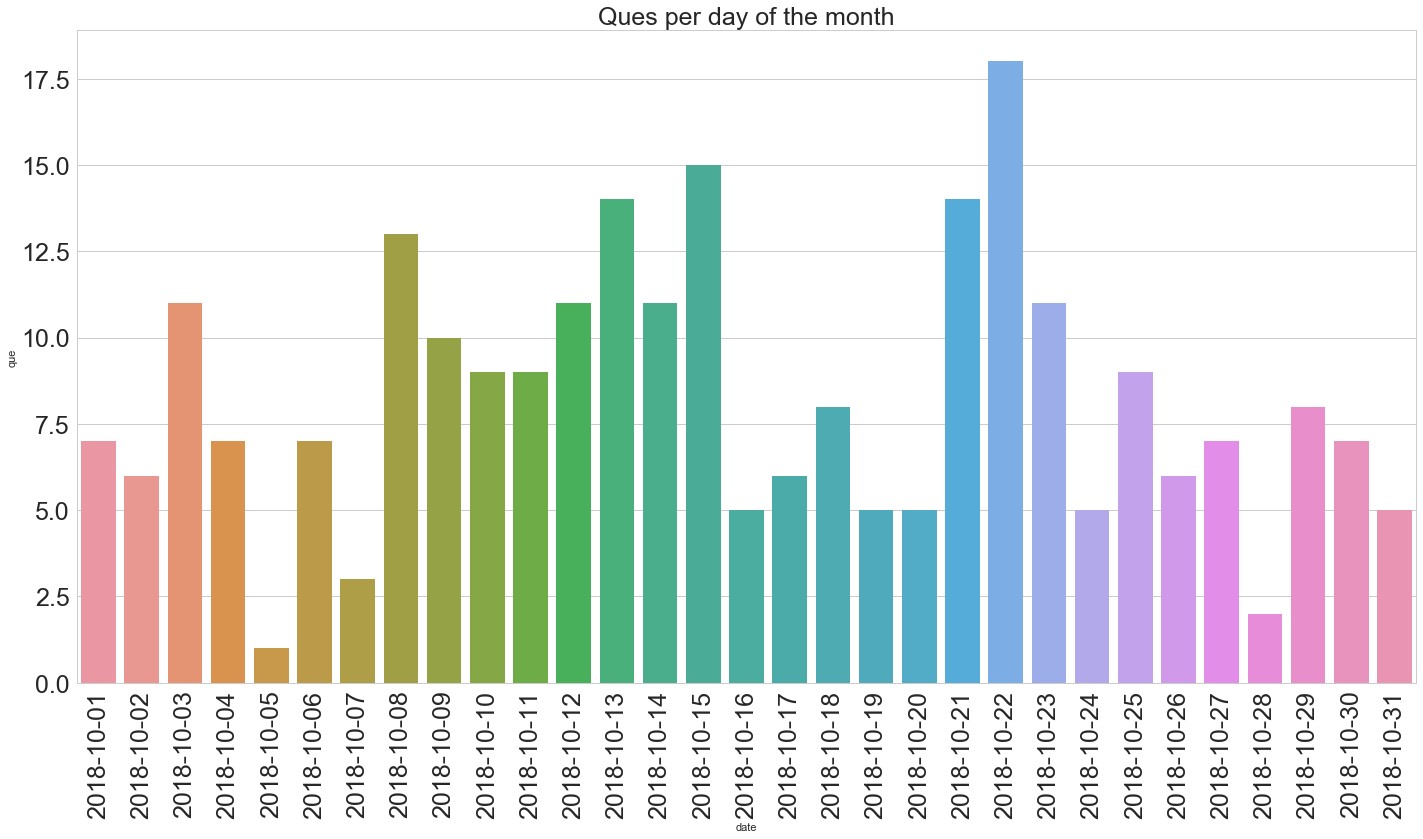

In [24]:
#lets try a bar plot of the month
sns.barplot(x ="date",y ="que",  data = df_count2)
plt.title("Ques per day of the month", fontsize = 25)
plt.yticks (fontsize = 25)
plt.xticks(rotation = 90, fontsize = 25)

## total demand

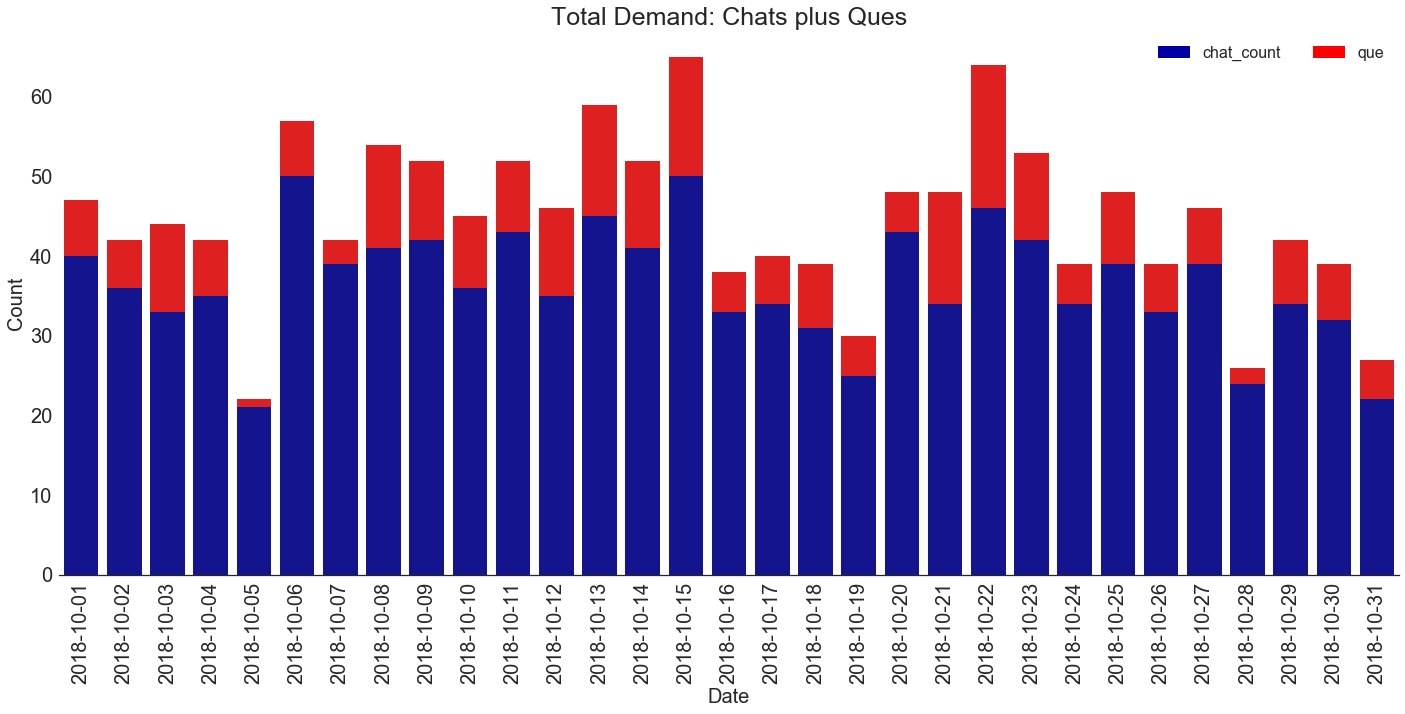

In [25]:
#Read in data & create total column
df_count2["total"] = df_count2["chat_count"] + df_count2["que"]

#stacked_bar_data = pd.read_csv("C:\stacked_bar.csv")

stacked_bar_data = df_count2

#stacked_bar_data["total"] = stacked_bar_data.Series1 + stacked_bar_data.Series2

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = stacked_bar_data.date, y = stacked_bar_data.total, color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = stacked_bar_data.date, y = stacked_bar_data["chat_count"], color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['chat_count', 'que'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Count")
bottom_plot.set_xlabel("Date")
plt.yticks (fontsize = 25)
plt.xticks(rotation = 90, fontsize = 25)
plt.title("Total Demand: Chats plus Ques", fontsize = 25)

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(20)


Okay, lets loop through and get a count for each day of the month

## Live chat per day of the week


Rearrange from df_count to create df_count3 which includes the days of the week.  We can now create a total demand profile for the days of the week like we did for day of the month

In [26]:
#lets add the days of the week
df_count3 =df_count
#df_dotw["days_of_week"] = df_dotw["date"].dt.day_name()
df_count3 = df_count.groupby(pd.Grouper(freq ='D')).count()



## Tip
Don't appreviate the date yet or you won't be able to get the dotw from it

In [27]:
#this copies the date over from the index so we can use it in the names of the bar chart and lets us get days of the week
df_count3["date"]=df_count3.index
#this gets the days of the week from the date
df_count3["dotw"] = df_count3["date"].dt.day_name()


In [28]:
#creates a total column of chat count and que count
df_count3["total"] = df_count3["chat_count"] + df_count3["que"]


Now we need the total for every monday to Sun

In [29]:
#creates two dictionaries based on the groups
total_count = df_count3.groupby('dotw')["total"].sum().to_dict()
chat_count = df_count3.groupby('dotw')['chat_count'].sum().to_dict()
#creates two new df's based on the dictionaries
df_total_count= pd.DataFrame.from_dict(total_count, columns = ["total"],orient = "index")
df_chat_count= pd.DataFrame.from_dict(chat_count, columns = ["chat_count"],orient = "index")

df_combined = df_chat_count.join(df_total_count,  how = "left")


reorder the index to go from Monday to Sunday

In [30]:
df_combined = df_combined.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
df_combined                                   

,chat_count,total
Monday,211,272
Tuesday,185,224
Wednesday,159,195
Thursday,148,181
Friday,114,137
Saturday,177,210
Sunday,138,168


make a stacked bar chart

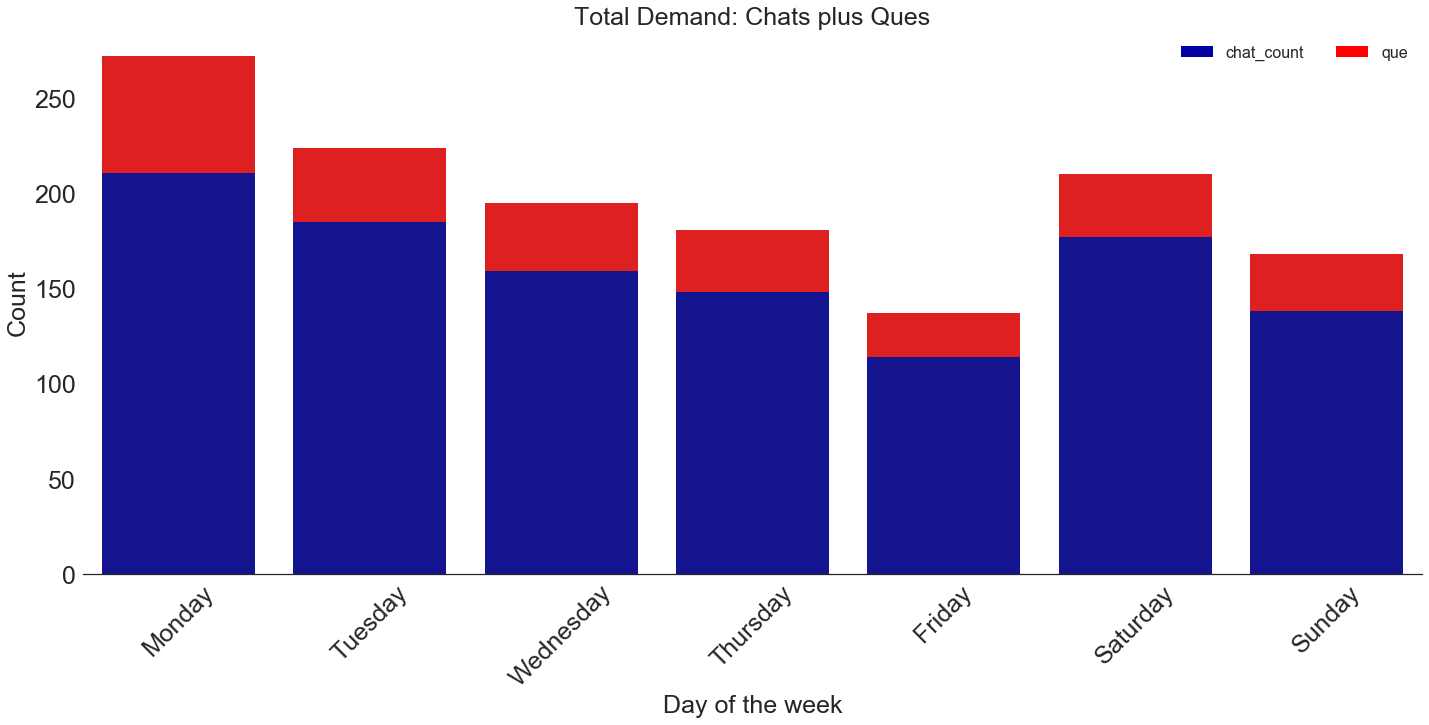

In [31]:
#create a day of the week column for the x labels
df_combined ["DOTW"] = df_combined.index

#stacked_bar_data = pd.read_csv("C:\stacked_bar.csv")

stacked_bar_data = df_combined

#stacked_bar_data["total"] = stacked_bar_data.Series1 + stacked_bar_data.Series2

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = stacked_bar_data.DOTW, y = stacked_bar_data.total, color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = stacked_bar_data.DOTW, y = stacked_bar_data["chat_count"], color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['chat_count', 'que'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Count")
bottom_plot.set_xlabel("Day of the week")
plt.yticks (fontsize = 25)
plt.xticks(rotation = 45, fontsize = 25)
plt.title("Total Demand: Chats plus Ques", fontsize = 25)

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(25)

# 24 Hour profile

In this we're going to cut the data by hour to see what our demand profile is going to be.  We'll call this an unimaginative df_count4

In [32]:
#lets add the days of the week
df_count4 =df_count



In [33]:
#df_dotw["days_of_week"] = df_dotw["date"].dt.day_name()
df_count4 = df_count.groupby(pd.Grouper(freq ='H')).count()



In [34]:
df_count4['time'] = df_count4.index
#df_count4.head()

In [35]:
df_count4["total"] = df_count4['chat_count'] + df_count4['que']

In [36]:
#this copies the date over from the index so we can use it in the names of the bar chart and lets us get days of the week
#df_count3["date"]=df_count3.index
#this gets the days of the week from the date
df_count4["time"] = df_count4["time"].dt.time


In [37]:
#creates two dictionaries based on the groups
total_count_per_hour = df_count4.groupby('time')["total"].sum().to_dict()
chat_count_per_hour = df_count4.groupby('time')['chat_count'].sum().to_dict()
#creates two new df's based on the dictionaries
df_total_count_per_hour= pd.DataFrame.from_dict(total_count_per_hour, columns = ["total"],orient = "index")
df_chat_count_per_hour= pd.DataFrame.from_dict(chat_count_per_hour, columns = ["chat_count"],orient = "index")

df_combined4 = df_chat_count_per_hour.join(df_total_count_per_hour,  how = "left")
df_combined4.head(30)

,chat_count,total
00:00:00,0,0
01:00:00,0,0
02:00:00,0,0
03:00:00,0,0
04:00:00,0,0
05:00:00,0,0
06:00:00,0,0
07:00:00,0,0
08:00:00,36,40
09:00:00,93,113


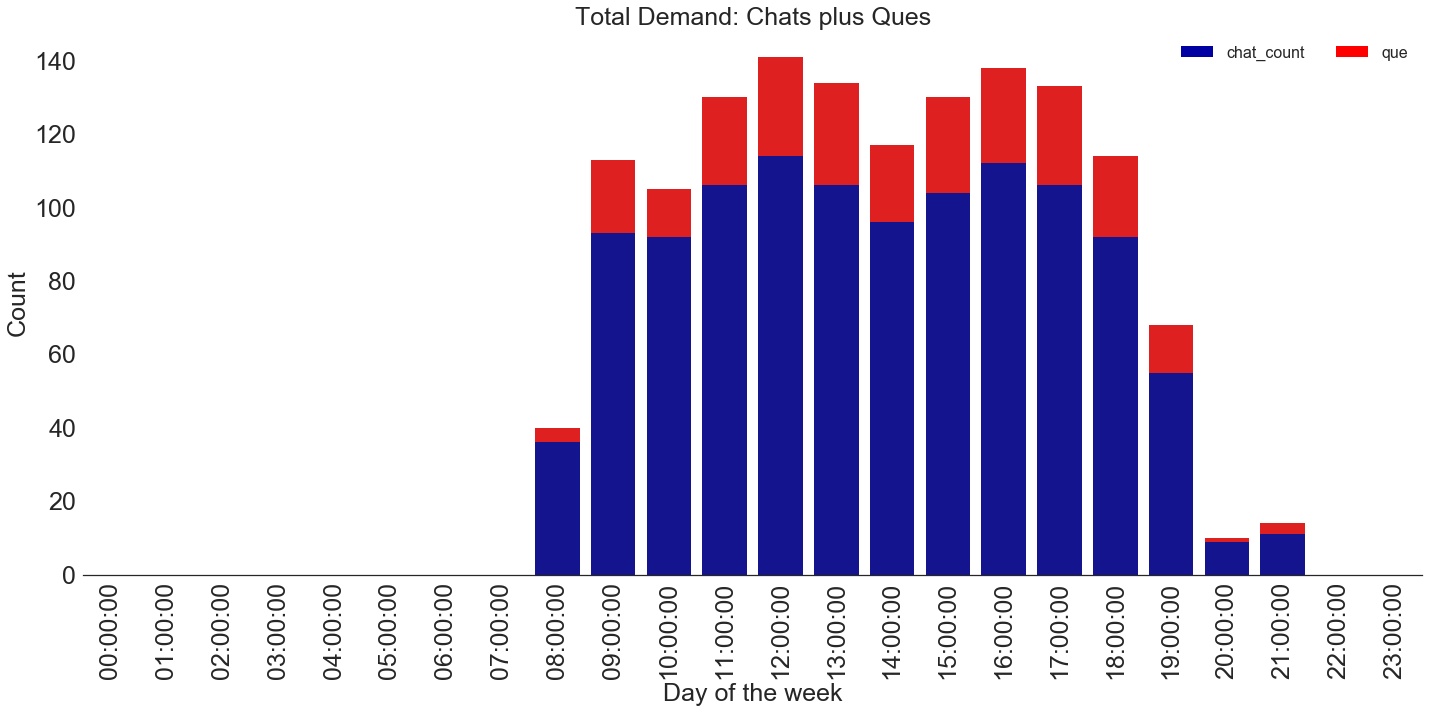

In [38]:

#create a time column for the x values labels
df_combined4['time'] = df_combined4.index

stacked_bar_data = df_combined4

#stacked_bar_data["total"] = stacked_bar_data.Series1 + stacked_bar_data.Series2

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = stacked_bar_data.time, y = stacked_bar_data.total, color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = stacked_bar_data.time, y = stacked_bar_data["chat_count"], color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['chat_count', 'que'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Count")
bottom_plot.set_xlabel("Day of the week")
plt.yticks (fontsize = 25)
plt.xticks(rotation = 90, fontsize = 25)
plt.title("Total Demand: Chats plus Ques", fontsize = 25)

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(25)

## By weekday and by hour

could we cut the data again to see if there is a difference between weekdays and weekends

In [39]:
#lets add the days of the week
df_count5 =df_count



In [40]:
#df_dotw["days_of_week"] = df_dotw["date"].dt.day_name()
df_count5 = df_count5.groupby(pd.Grouper(freq ='H')).count()

In [41]:
df_count5['time'] = df_count5.index
#df_count4.head()

In [42]:
df_count5["total"] = df_count5['chat_count'] + df_count5['que']

In [43]:
df_count5['day'] = df_count5.time.dt.day_name()

In [44]:
df_count5.head()

,date,chat_count,que,time,total,day
datetime,,,,,,
2018-10-01 08:00:00,4,4,0,2018-10-01 08:00:00,4,Monday
2018-10-01 09:00:00,5,5,0,2018-10-01 09:00:00,5,Monday
2018-10-01 10:00:00,1,1,0,2018-10-01 10:00:00,1,Monday
2018-10-01 11:00:00,5,5,0,2018-10-01 11:00:00,5,Monday
2018-10-01 12:00:00,4,4,0,2018-10-01 12:00:00,4,Monday


In [45]:
#this copies the date over from the index so we can use it in the names of the bar chart and lets us get days of the week
#df_count3["date"]=df_count3.index
#this gets the days of the week from the date
df_count5["time"] = df_count5["time"].dt.time

In [46]:
#creates two dictionaries based on the groups
total_count_per_hour_per_day = df_count5.groupby(['day','time'])["total"].sum().to_dict()
chat_count_per_hour_per_day = df_count5.groupby(['day','time'])['chat_count'].sum().to_dict()
#creates two new df's based on the dictionaries
df_total_count_per_hour= pd.DataFrame.from_dict(total_count_per_hour_per_day, columns = ["total"],orient = "index")
df_chat_count_per_hour= pd.DataFrame.from_dict(chat_count_per_hour_per_day, columns = ["chat_count"],orient = "index")

df_combined5 = df_chat_count_per_hour.join(df_total_count_per_hour,  how = "left")
 
df_combined5.head()

,chat_count,total
"(Friday, 00:00:00)",0,0
"(Friday, 01:00:00)",0,0
"(Friday, 02:00:00)",0,0
"(Friday, 03:00:00)",0,0
"(Friday, 04:00:00)",0,0


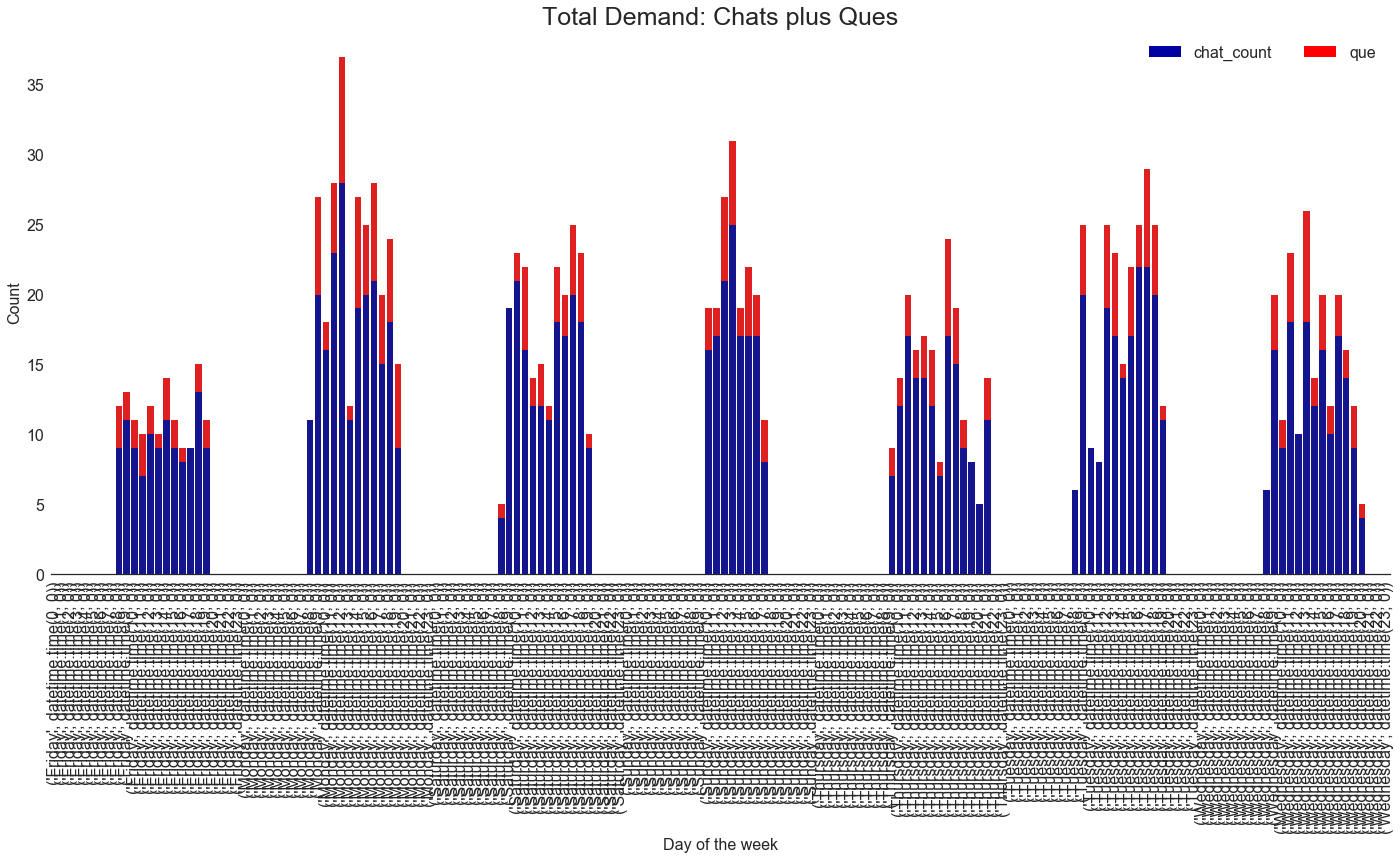

In [47]:

#create a time column for the x values labels
df_combined5['daytime'] = df_combined5.index

stacked_bar_data = df_combined5

#stacked_bar_data["total"] = stacked_bar_data.Series1 + stacked_bar_data.Series2

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = stacked_bar_data.daytime, y = stacked_bar_data.total, color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = stacked_bar_data.daytime, y = stacked_bar_data["chat_count"], color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['chat_count', 'que'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Count")
bottom_plot.set_xlabel("Day of the week")
plt.yticks (fontsize = 25)
plt.xticks(rotation = 90, fontsize = 25)
plt.title("Total Demand: Chats plus Ques", fontsize = 25)


#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

Okay, this is a bit of a mess.  Lets just break it up into days then plot each individually.


In [48]:
#first convert the objects in daytime to a str
df_combined5["filter"] =df_combined5["daytime"].astype('str')
#then create a new dataframe that contains only those values
df_friday = df_combined5[df_combined5["filter"].str.contains("Fri")]
df_friday.head()

,chat_count,total,daytime,filter
"(Friday, 00:00:00)",0,0,"(Friday, 00:00:00)","('Friday', datetime.time(0, 0))"
"(Friday, 01:00:00)",0,0,"(Friday, 01:00:00)","('Friday', datetime.time(1, 0))"
"(Friday, 02:00:00)",0,0,"(Friday, 02:00:00)","('Friday', datetime.time(2, 0))"
"(Friday, 03:00:00)",0,0,"(Friday, 03:00:00)","('Friday', datetime.time(3, 0))"
"(Friday, 04:00:00)",0,0,"(Friday, 04:00:00)","('Friday', datetime.time(4, 0))"


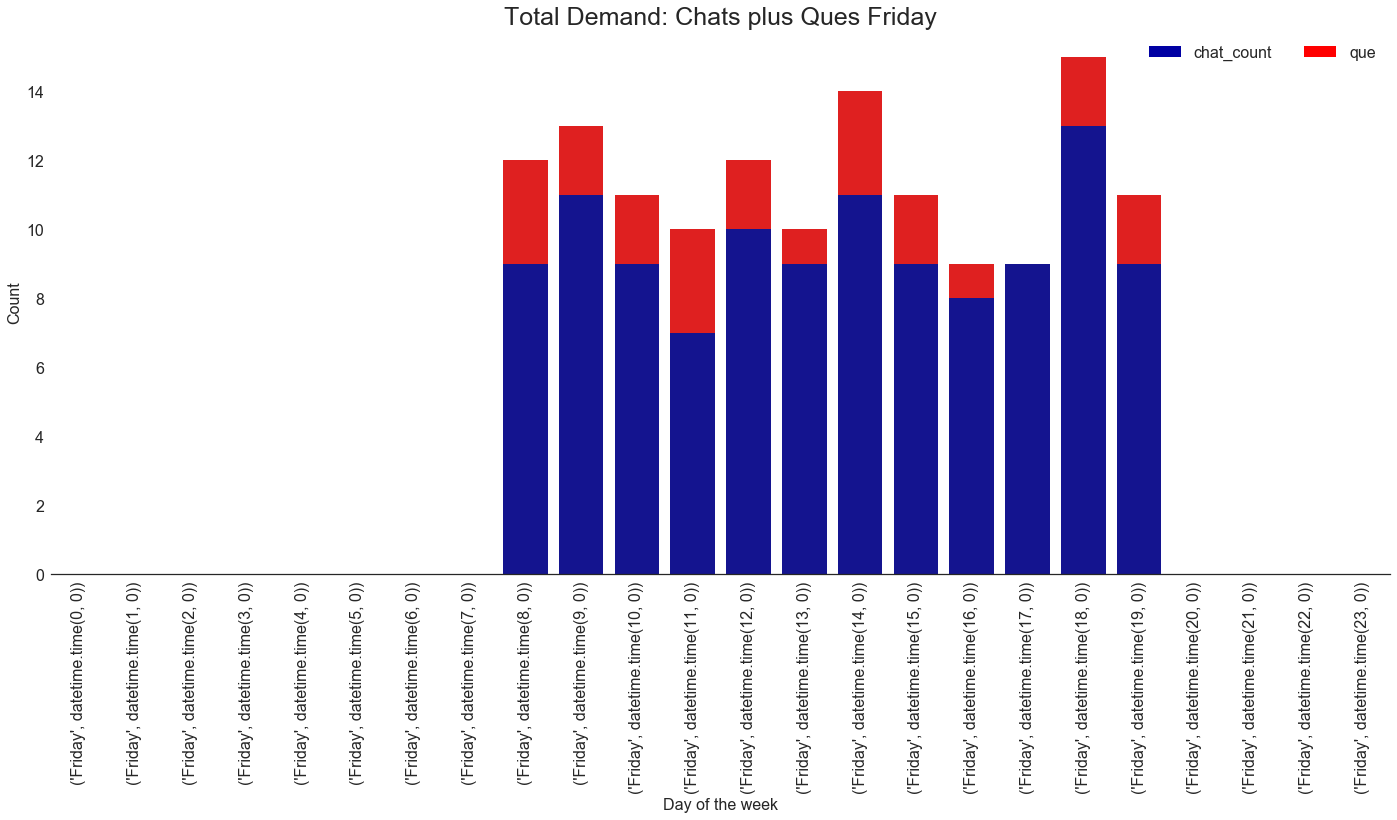

In [49]:
#create a time column for the x values labels
#df_combined5['daytime'] = df_combined5.index

stacked_bar_data = df_friday

#stacked_bar_data["total"] = stacked_bar_data.Series1 + stacked_bar_data.Series2

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = stacked_bar_data.daytime, y = stacked_bar_data.total, color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = stacked_bar_data.daytime, y = stacked_bar_data["chat_count"], color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['chat_count', 'que'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Count")
bottom_plot.set_xlabel("Day of the week")
plt.yticks (fontsize = 25)
plt.xticks(rotation = 90, fontsize = 25)
plt.title("Total Demand: Chats plus Ques Friday", fontsize = 25)


#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

In [50]:
df_monday = df_combined5[df_combined5["filter"].str.contains("Mon")]
df_monday.head()

,chat_count,total,daytime,filter
"(Monday, 00:00:00)",0,0,"(Monday, 00:00:00)","('Monday', datetime.time(0, 0))"
"(Monday, 01:00:00)",0,0,"(Monday, 01:00:00)","('Monday', datetime.time(1, 0))"
"(Monday, 02:00:00)",0,0,"(Monday, 02:00:00)","('Monday', datetime.time(2, 0))"
"(Monday, 03:00:00)",0,0,"(Monday, 03:00:00)","('Monday', datetime.time(3, 0))"
"(Monday, 04:00:00)",0,0,"(Monday, 04:00:00)","('Monday', datetime.time(4, 0))"


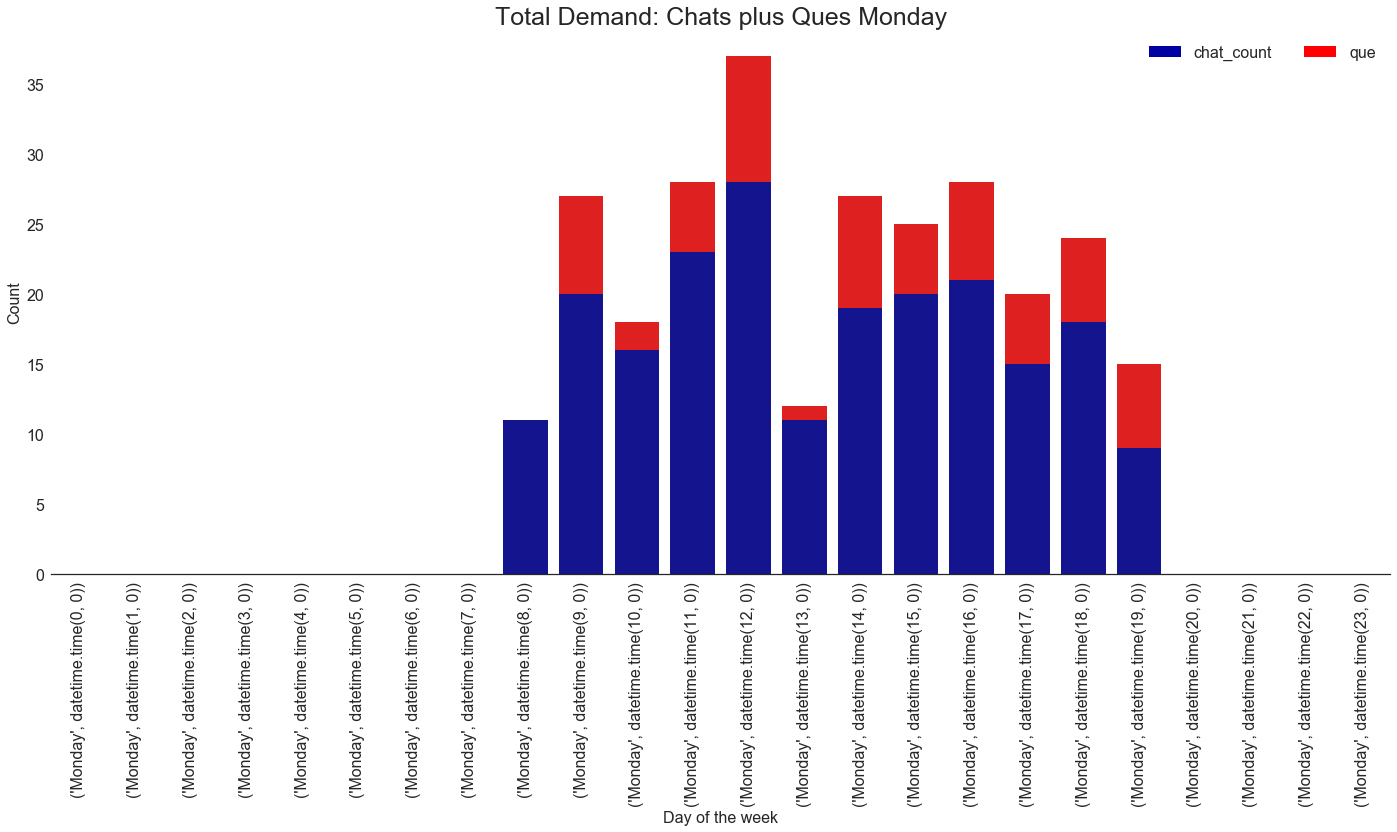

In [51]:
#create a time column for the x values labels
#df_combined5['daytime'] = df_combined5.index

stacked_bar_data = df_monday

#stacked_bar_data["total"] = stacked_bar_data.Series1 + stacked_bar_data.Series2

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = stacked_bar_data.daytime, y = stacked_bar_data.total, color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = stacked_bar_data.daytime, y = stacked_bar_data["chat_count"], color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['chat_count', 'que'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Count")
bottom_plot.set_xlabel("Day of the week")
plt.yticks (fontsize = 25)
plt.xticks(rotation = 90, fontsize = 25)
plt.title("Total Demand: Chats plus Ques Monday", fontsize = 25)


#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

In [52]:
df_tueday = df_combined5[df_combined5["filter"].str.contains("Tue")]
df_tueday.head()

,chat_count,total,daytime,filter
"(Tuesday, 00:00:00)",0,0,"(Tuesday, 00:00:00)","('Tuesday', datetime.time(0, 0))"
"(Tuesday, 01:00:00)",0,0,"(Tuesday, 01:00:00)","('Tuesday', datetime.time(1, 0))"
"(Tuesday, 02:00:00)",0,0,"(Tuesday, 02:00:00)","('Tuesday', datetime.time(2, 0))"
"(Tuesday, 03:00:00)",0,0,"(Tuesday, 03:00:00)","('Tuesday', datetime.time(3, 0))"
"(Tuesday, 04:00:00)",0,0,"(Tuesday, 04:00:00)","('Tuesday', datetime.time(4, 0))"


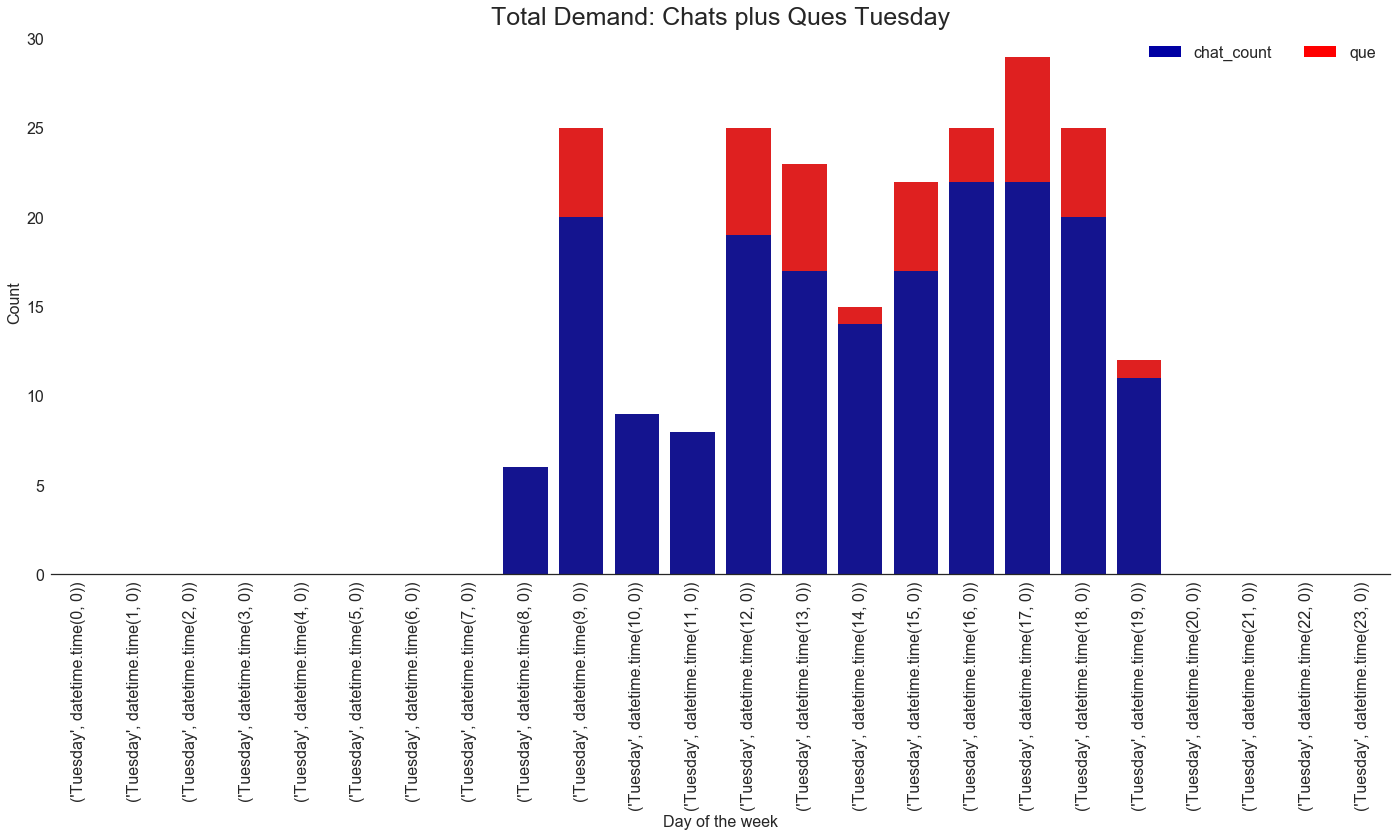

In [53]:
#create a time column for the x values labels
#df_combined5['daytime'] = df_combined5.index

stacked_bar_data = df_tueday

#stacked_bar_data["total"] = stacked_bar_data.Series1 + stacked_bar_data.Series2

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = stacked_bar_data.daytime, y = stacked_bar_data.total, color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = stacked_bar_data.daytime, y = stacked_bar_data["chat_count"], color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['chat_count', 'que'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Count")
bottom_plot.set_xlabel("Day of the week")
plt.yticks (fontsize = 25)
plt.xticks(rotation = 90, fontsize = 25)
plt.title("Total Demand: Chats plus Ques Tuesday", fontsize = 25)


#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

In [54]:
df_wednesday = df_combined5[df_combined5["filter"].str.contains("Wed")]
df_wednesday.head()

,chat_count,total,daytime,filter
"(Wednesday, 00:00:00)",0,0,"(Wednesday, 00:00:00)","('Wednesday', datetime.time(0, 0))"
"(Wednesday, 01:00:00)",0,0,"(Wednesday, 01:00:00)","('Wednesday', datetime.time(1, 0))"
"(Wednesday, 02:00:00)",0,0,"(Wednesday, 02:00:00)","('Wednesday', datetime.time(2, 0))"
"(Wednesday, 03:00:00)",0,0,"(Wednesday, 03:00:00)","('Wednesday', datetime.time(3, 0))"
"(Wednesday, 04:00:00)",0,0,"(Wednesday, 04:00:00)","('Wednesday', datetime.time(4, 0))"


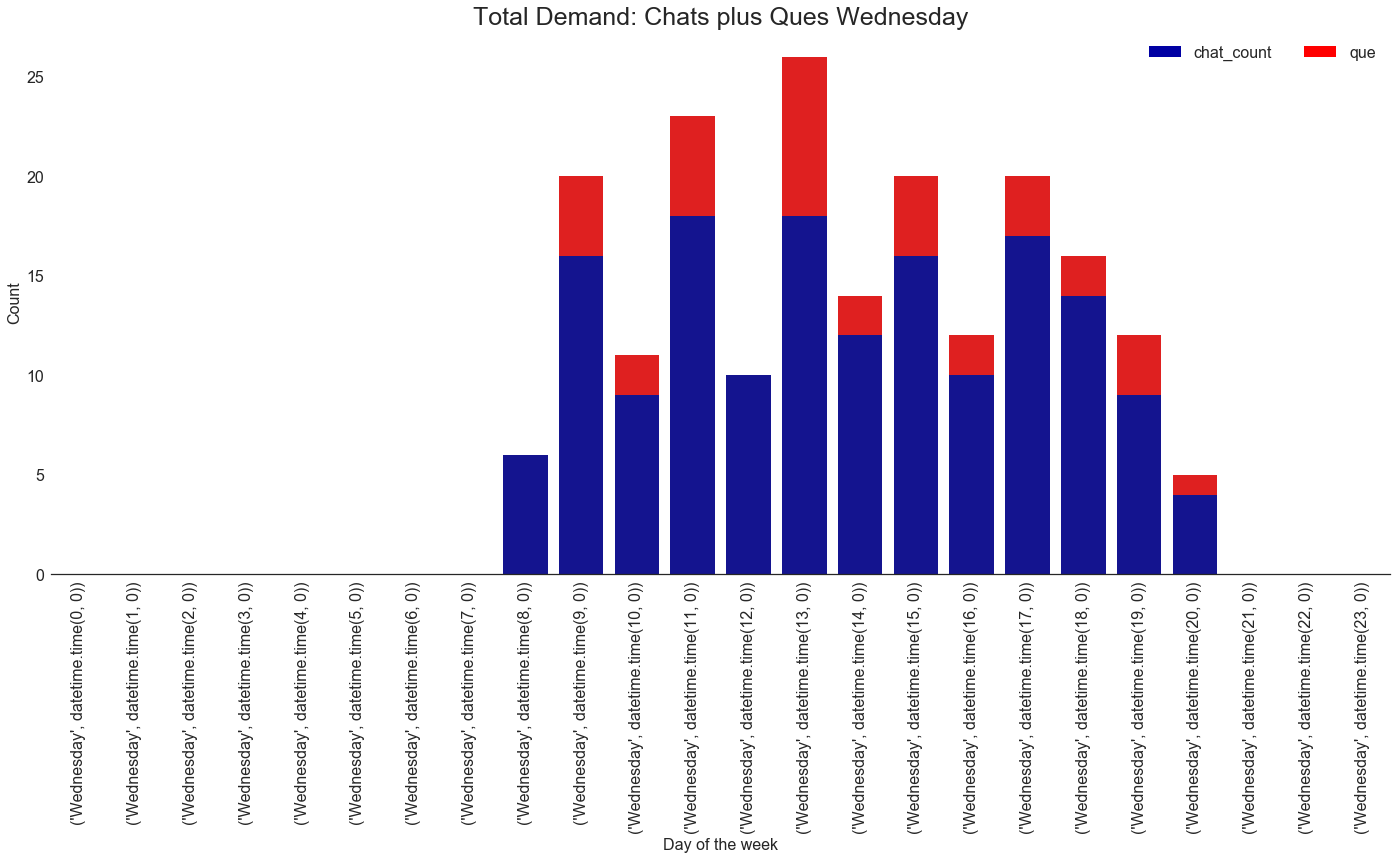

In [55]:
#create a time column for the x values labels
#df_combined5['daytime'] = df_combined5.index

stacked_bar_data = df_wednesday

#stacked_bar_data["total"] = stacked_bar_data.Series1 + stacked_bar_data.Series2

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = stacked_bar_data.daytime, y = stacked_bar_data.total, color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = stacked_bar_data.daytime, y = stacked_bar_data["chat_count"], color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['chat_count', 'que'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Count")
bottom_plot.set_xlabel("Day of the week")
plt.yticks (fontsize = 25)
plt.xticks(rotation = 90, fontsize = 25)
plt.title("Total Demand: Chats plus Ques Wednesday", fontsize = 25)


#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

In [56]:
df_thursday = df_combined5[df_combined5["filter"].str.contains("Thu")]
df_thursday.head()

,chat_count,total,daytime,filter
"(Thursday, 00:00:00)",0,0,"(Thursday, 00:00:00)","('Thursday', datetime.time(0, 0))"
"(Thursday, 01:00:00)",0,0,"(Thursday, 01:00:00)","('Thursday', datetime.time(1, 0))"
"(Thursday, 02:00:00)",0,0,"(Thursday, 02:00:00)","('Thursday', datetime.time(2, 0))"
"(Thursday, 03:00:00)",0,0,"(Thursday, 03:00:00)","('Thursday', datetime.time(3, 0))"
"(Thursday, 04:00:00)",0,0,"(Thursday, 04:00:00)","('Thursday', datetime.time(4, 0))"


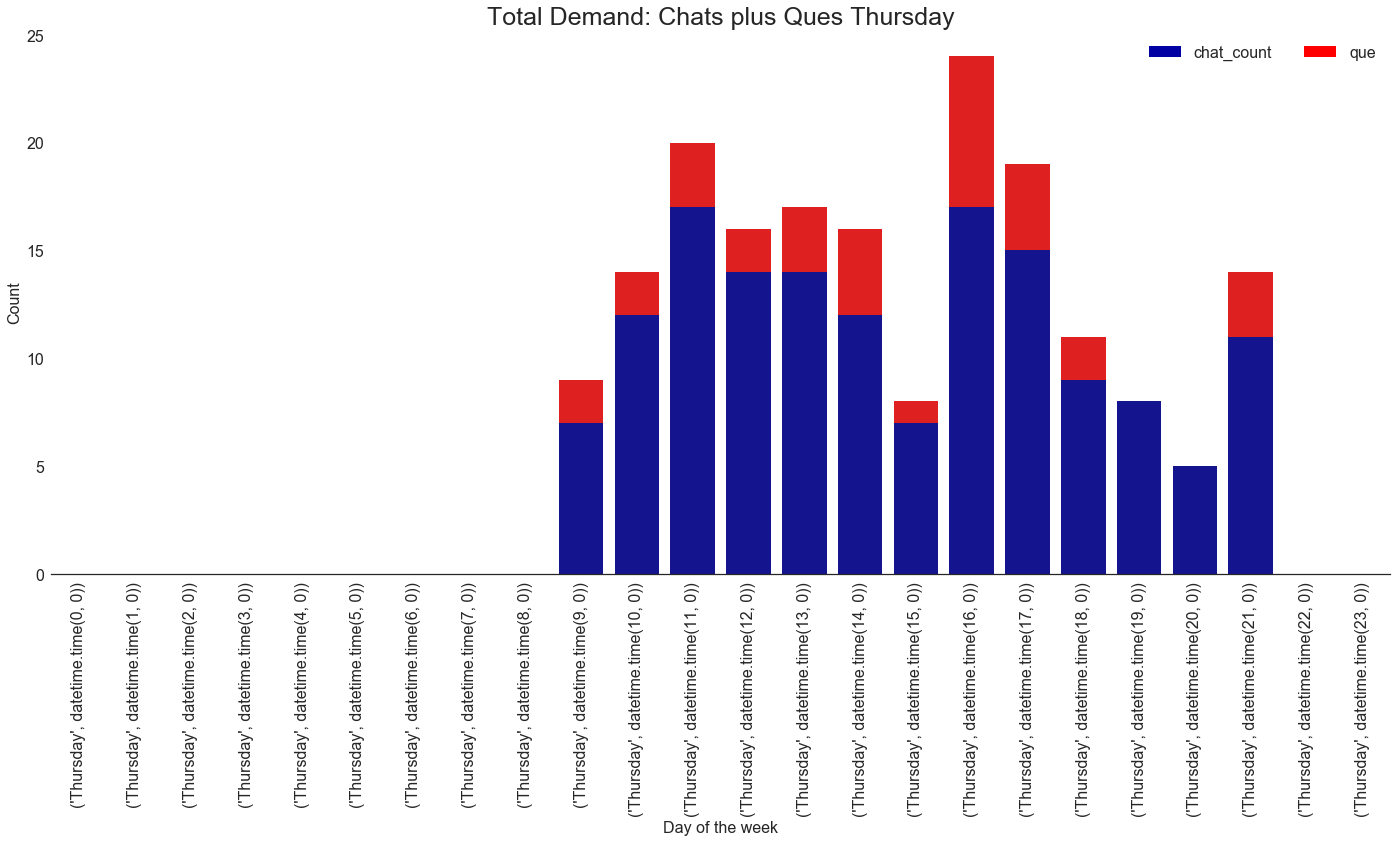

In [57]:
#create a time column for the x values labels
#df_combined5['daytime'] = df_combined5.index

stacked_bar_data = df_thursday

#stacked_bar_data["total"] = stacked_bar_data.Series1 + stacked_bar_data.Series2

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = stacked_bar_data.daytime, y = stacked_bar_data.total, color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = stacked_bar_data.daytime, y = stacked_bar_data["chat_count"], color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['chat_count', 'que'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Count")
bottom_plot.set_xlabel("Day of the week")
plt.yticks (fontsize = 25)
plt.xticks(rotation = 90, fontsize = 25)
plt.title("Total Demand: Chats plus Ques Thursday", fontsize = 25)


#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

In [58]:
df_saturday = df_combined5[df_combined5["filter"].str.contains("Sat")]
df_saturday.head()

,chat_count,total,daytime,filter
"(Saturday, 00:00:00)",0,0,"(Saturday, 00:00:00)","('Saturday', datetime.time(0, 0))"
"(Saturday, 01:00:00)",0,0,"(Saturday, 01:00:00)","('Saturday', datetime.time(1, 0))"
"(Saturday, 02:00:00)",0,0,"(Saturday, 02:00:00)","('Saturday', datetime.time(2, 0))"
"(Saturday, 03:00:00)",0,0,"(Saturday, 03:00:00)","('Saturday', datetime.time(3, 0))"
"(Saturday, 04:00:00)",0,0,"(Saturday, 04:00:00)","('Saturday', datetime.time(4, 0))"


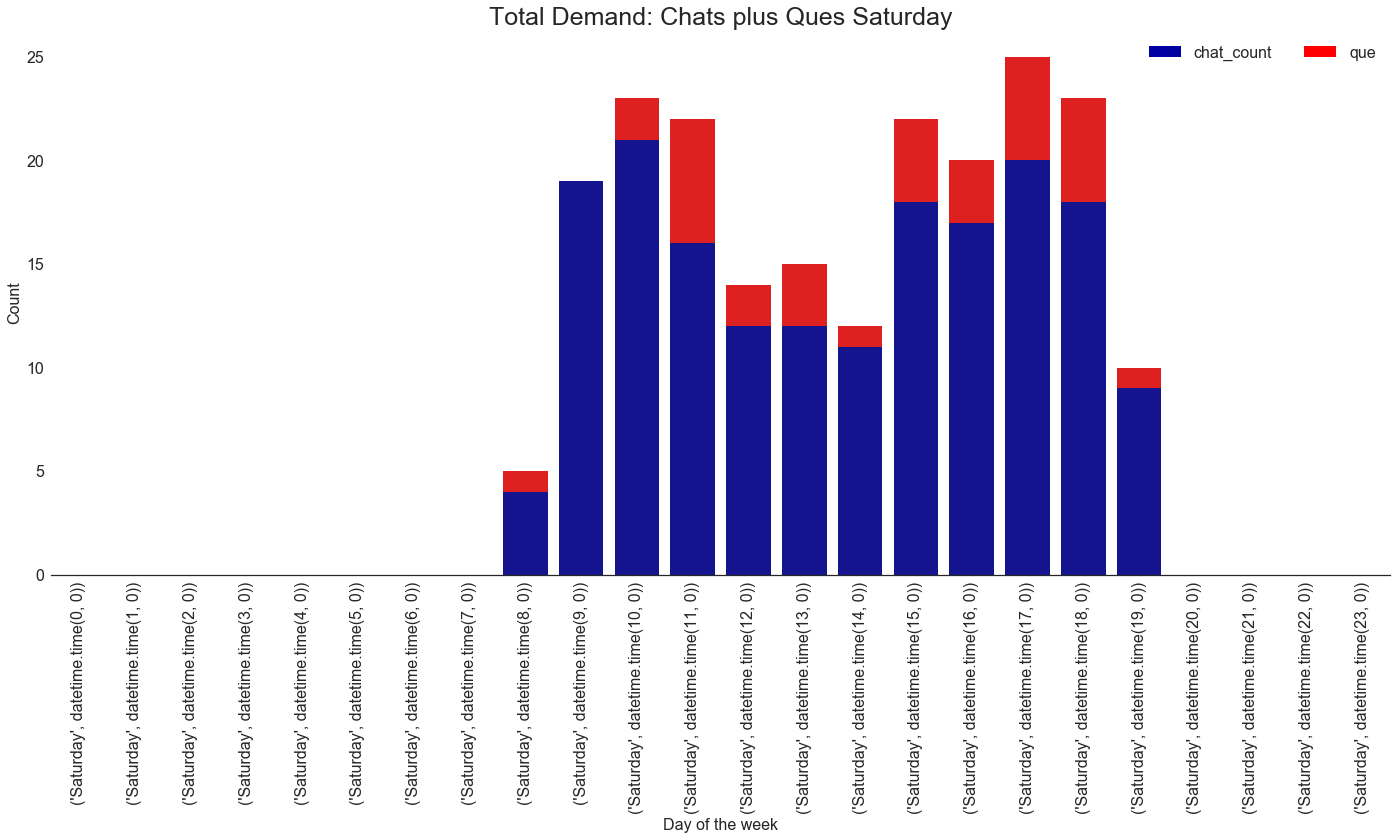

In [59]:
#create a time column for the x values labels
#df_combined5['daytime'] = df_combined5.index

stacked_bar_data = df_saturday

#stacked_bar_data["total"] = stacked_bar_data.Series1 + stacked_bar_data.Series2

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = stacked_bar_data.daytime, y = stacked_bar_data.total, color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = stacked_bar_data.daytime, y = stacked_bar_data["chat_count"], color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['chat_count', 'que'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Count")
bottom_plot.set_xlabel("Day of the week")
plt.yticks (fontsize = 25)
plt.xticks(rotation = 90, fontsize = 25)
plt.title("Total Demand: Chats plus Ques Saturday", fontsize = 25)


#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

In [60]:
df_sunday = df_combined5[df_combined5["filter"].str.contains("Sun")]
df_sunday.head()

,chat_count,total,daytime,filter
"(Sunday, 00:00:00)",0,0,"(Sunday, 00:00:00)","('Sunday', datetime.time(0, 0))"
"(Sunday, 01:00:00)",0,0,"(Sunday, 01:00:00)","('Sunday', datetime.time(1, 0))"
"(Sunday, 02:00:00)",0,0,"(Sunday, 02:00:00)","('Sunday', datetime.time(2, 0))"
"(Sunday, 03:00:00)",0,0,"(Sunday, 03:00:00)","('Sunday', datetime.time(3, 0))"
"(Sunday, 04:00:00)",0,0,"(Sunday, 04:00:00)","('Sunday', datetime.time(4, 0))"


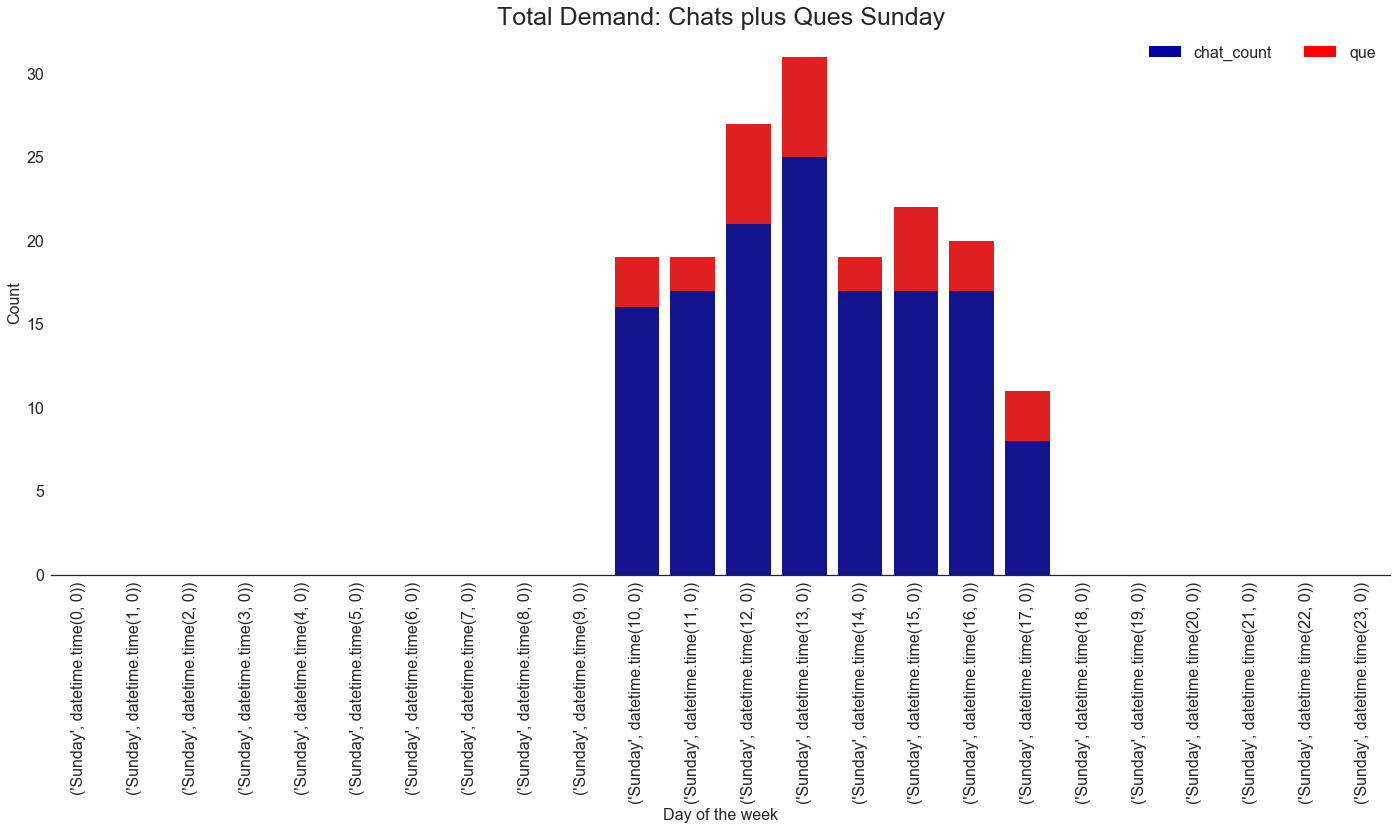

In [61]:
#create a time column for the x values labels
#df_combined5['daytime'] = df_combined5.index

stacked_bar_data = df_sunday

#stacked_bar_data["total"] = stacked_bar_data.Series1 + stacked_bar_data.Series2

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = stacked_bar_data.daytime, y = stacked_bar_data.total, color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = stacked_bar_data.daytime, y = stacked_bar_data["chat_count"], color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['chat_count', 'que'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Count")
bottom_plot.set_xlabel("Day of the week")
plt.yticks (fontsize = 25)
plt.xticks(rotation = 90, fontsize = 25)
plt.title("Total Demand: Chats plus Ques Sunday", fontsize = 25)


#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

That's pretty much it for preliminary reports.  The next logical move is to look at some Natural Lanuage processing.  This is done in the next jupyter file.